# Triage

# Load Packages

In [1]:
import os.path

import tifffile

import pandas as pd

import matplotlib.pyplot as plt

During triage,
I was looking to label the radiographs based on the present of

- uncollimated beam
- side marker
- lateral marker
- shoe
- shoe nail
- chain
- pen
- needle
- lead glove
- flipped
- margin

In [2]:
labels = [
    "uncollimated beam",
    "side marker",
    "lateral marker",
    "shoe",
    "shoe nail",
    "chain",
    "pen",
    "needle",
    "lead glove",
    "flipped",
    "margin",
]

In [3]:
TIFF_ROOT = "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0"

# Load Information from Tiff

In [4]:
tiff_df = pd.read_csv(
    os.path.join(TIFF_ROOT, "complete-studies.csv"), dtype={"id": str}
)
tiff_df.head()

id                     view                               tiff  height  \
0  0      L FORE CARPUS DLPMO      l/fore-carpus/dlpmo/0000.tiff    2560   
1  0      L FORE CARPUS DMPLO      l/fore-carpus/dmplo/0000.tiff    2560   
2  0         L FORE CARPUS DP         l/fore-carpus/dp/0000.tiff    2560   
3  0  L FORE CARPUS FLEXED DP  l/fore-carpus/flexed-dp/0000.tiff    2048   
4  0  L FORE CARPUS FLEXED LM  l/fore-carpus/flexed-lm/0000.tiff    2560   

   width  
0   2048  
1   2048  
2   2048  
3   2560  
4   2048

# Load Labels from Triage

In [5]:
triage_with_burned_in_text_df = pd.read_csv(
    "labeling-data/raw-triage-with-burned-in-text.csv"
)
triage_with_burned_in_text_df.head()

image     id  \
0  http://144.214.170.197:8082/l/hind-fetlock/dmp...  36194   
1  http://144.214.170.197:8082/r/fore-foot/lm/020...  36244   
2  http://144.214.170.197:8082/r/fore-foot/lm/020...  36197   
3  http://144.214.170.197:8082/l/fore-fetlock/fle...  35882   
4  http://144.214.170.197:8082/l/hind-fetlock/lm/...  35801   

                                              choice  annotator  \
0                                        side marker          1   
1  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
2  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
3               {"choices": ["side marker", "shoe"]}          1   
4                                        side marker          1   

   annotation_id                   created_at                   updated_at  \
0          20842  2022-01-17T04:29:10.727766Z  2022-01-17T04:29:10.727814Z   
1          20834  2022-01-14T04:02:41.172039Z  2022-01-14T04:02:46.746799Z   
2          20787  2022-01-14T04:01:12.578477Z  2022-01-14T04:01:22.536722Z   
3          20472  2022-01-14T03:50:41.170970Z  2022-01-14T03:50:50.104368Z   
4          20391  2022-01-14T03:47:47.210632Z  2022-01-14T03:47:56.720336Z   

   lead_time  
0     12.765  
1   8040.693  
2   7956.481  
3   7324.051  
4   7150.663

In [6]:
triage_without_burned_in_text_df = pd.read_csv(
    "labeling-data/raw-triage-without-burned-in-text.csv"
)
triage_without_burned_in_text_df.head()

image    id  \
0  http://144.214.170.197:8081/r/fore-foot/dp/009...  4777   
1  http://144.214.170.197:8081/r/fore-foot/dp/000...  4689   
2  http://144.214.170.197:8081/r/hind-stifle/lm/0...  5035   
3  http://144.214.170.197:8081/r/hind-stifle/cdl-...  4854   
4  http://144.214.170.197:8081/r/hind-stifle/cdl-...  4856   

                                              choice  annotator  \
0  {"choices": ["uncollimated beam", "shoe", "sho...          1   
1  {"choices": ["lateral marker", "shoe", "shoe n...          1   
2                                                NaN          1   
3                                  uncollimated beam          1   
4  {"choices": ["side marker", "darker", "landsca...          1   

   annotation_id                   created_at                   updated_at  \
0           7110  2021-11-30T10:42:16.577093Z  2021-11-30T10:42:17.797216Z   
1           7079  2021-11-30T10:38:31.698444Z  2021-11-30T10:38:34.832339Z   
2           7056  2021-11-30T10:35:55.433222Z  2021-11-30T10:36:02.161728Z   
3           6997  2021-11-30T10:30:57.845230Z  2021-11-30T10:30:58.991472Z   
4           6995  2021-11-30T10:30:43.795779Z  2021-11-30T10:30:52.535102Z   

   lead_time  
0  14798.297  
1  14575.326  
2  14422.662  
3  14119.509  
4  14113.044

In [7]:
triage_df = pd.concat([triage_with_burned_in_text_df, triage_without_burned_in_text_df])
triage_df.head()

image     id  \
0  http://144.214.170.197:8082/l/hind-fetlock/dmp...  36194   
1  http://144.214.170.197:8082/r/fore-foot/lm/020...  36244   
2  http://144.214.170.197:8082/r/fore-foot/lm/020...  36197   
3  http://144.214.170.197:8082/l/fore-fetlock/fle...  35882   
4  http://144.214.170.197:8082/l/hind-fetlock/lm/...  35801   

                                              choice  annotator  \
0                                        side marker          1   
1  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
2  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
3               {"choices": ["side marker", "shoe"]}          1   
4                                        side marker          1   

   annotation_id                   created_at                   updated_at  \
0          20842  2022-01-17T04:29:10.727766Z  2022-01-17T04:29:10.727814Z   
1          20834  2022-01-14T04:02:41.172039Z  2022-01-14T04:02:46.746799Z   
2          20787  2022-01-14T04:01:12.578477Z  2022-01-14T04:01:22.536722Z   
3          20472  2022-01-14T03:50:41.170970Z  2022-01-14T03:50:50.104368Z   
4          20391  2022-01-14T03:47:47.210632Z  2022-01-14T03:47:56.720336Z   

   lead_time  
0     12.765  
1   8040.693  
2   7956.481  
3   7324.051  
4   7150.663

# Pre-processing Dataframe

In [8]:
triage_df["png"] = triage_df["image"].str.replace(
    "http://144.214.170.197:808[12]/", "", regex=True
)
triage_df.head()

image     id  \
0  http://144.214.170.197:8082/l/hind-fetlock/dmp...  36194   
1  http://144.214.170.197:8082/r/fore-foot/lm/020...  36244   
2  http://144.214.170.197:8082/r/fore-foot/lm/020...  36197   
3  http://144.214.170.197:8082/l/fore-fetlock/fle...  35882   
4  http://144.214.170.197:8082/l/hind-fetlock/lm/...  35801   

                                              choice  annotator  \
0                                        side marker          1   
1  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
2  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
3               {"choices": ["side marker", "shoe"]}          1   
4                                        side marker          1   

   annotation_id                   created_at                   updated_at  \
0          20842  2022-01-17T04:29:10.727766Z  2022-01-17T04:29:10.727814Z   
1          20834  2022-01-14T04:02:41.172039Z  2022-01-14T04:02:46.746799Z   
2          20787  2022-01-14T04:01:12.578477Z  2022-01-14T04:01:22.536722Z   
3          20472  2022-01-14T03:50:41.170970Z  2022-01-14T03:50:50.104368Z   
4          20391  2022-01-14T03:47:47.210632Z  2022-01-14T03:47:56.720336Z   

   lead_time                                png  
0     12.765      l/hind-fetlock/dmplo/0205.png  
1   8040.693            r/fore-foot/lm/0206.png  
2   7956.481            r/fore-foot/lm/0205.png  
3   7324.051  l/fore-fetlock/flexed-lm/0199.png  
4   7150.663         l/hind-fetlock/lm/0197.png

In [9]:
triage_df["tiff"] = triage_df["png"].str.replace(".png", ".tiff", regex=False)
triage_df.head()

image     id  \
0  http://144.214.170.197:8082/l/hind-fetlock/dmp...  36194   
1  http://144.214.170.197:8082/r/fore-foot/lm/020...  36244   
2  http://144.214.170.197:8082/r/fore-foot/lm/020...  36197   
3  http://144.214.170.197:8082/l/fore-fetlock/fle...  35882   
4  http://144.214.170.197:8082/l/hind-fetlock/lm/...  35801   

                                              choice  annotator  \
0                                        side marker          1   
1  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
2  {"choices": ["side marker", "shoe", "shoe nail"]}          1   
3               {"choices": ["side marker", "shoe"]}          1   
4                                        side marker          1   

   annotation_id                   created_at                   updated_at  \
0          20842  2022-01-17T04:29:10.727766Z  2022-01-17T04:29:10.727814Z   
1          20834  2022-01-14T04:02:41.172039Z  2022-01-14T04:02:46.746799Z   
2          20787  2022-01-14T04:01:12.578477Z  2022-01-14T04:01:22.536722Z   
3          20472  2022-01-14T03:50:41.170970Z  2022-01-14T03:50:50.104368Z   
4          20391  2022-01-14T03:47:47.210632Z  2022-01-14T03:47:56.720336Z   

   lead_time                                png  \
0     12.765      l/hind-fetlock/dmplo/0205.png   
1   8040.693            r/fore-foot/lm/0206.png   
2   7956.481            r/fore-foot/lm/0205.png   
3   7324.051  l/fore-fetlock/flexed-lm/0199.png   
4   7150.663         l/hind-fetlock/lm/0197.png   

                                 tiff  
0      l/hind-fetlock/dmplo/0205.tiff  
1            r/fore-foot/lm/0206.tiff  
2            r/fore-foot/lm/0205.tiff  
3  l/fore-fetlock/flexed-lm/0199.tiff  
4         l/hind-fetlock/lm/0197.tiff

Let's remove radiographs that might have go to triage but is not part of a complete set.

In [10]:
tiff_df.head()

id                     view                               tiff  height  \
0  0      L FORE CARPUS DLPMO      l/fore-carpus/dlpmo/0000.tiff    2560   
1  0      L FORE CARPUS DMPLO      l/fore-carpus/dmplo/0000.tiff    2560   
2  0         L FORE CARPUS DP         l/fore-carpus/dp/0000.tiff    2560   
3  0  L FORE CARPUS FLEXED DP  l/fore-carpus/flexed-dp/0000.tiff    2048   
4  0  L FORE CARPUS FLEXED LM  l/fore-carpus/flexed-lm/0000.tiff    2560   

   width  
0   2048  
1   2048  
2   2048  
3   2560  
4   2048

In [11]:
df = tiff_df.merge(triage_df[["tiff", "choice"]], left_on="tiff", right_on="tiff")
df.head()

id                     view                               tiff  height  \
0  0      L FORE CARPUS DLPMO      l/fore-carpus/dlpmo/0000.tiff    2560   
1  0      L FORE CARPUS DMPLO      l/fore-carpus/dmplo/0000.tiff    2560   
2  0         L FORE CARPUS DP         l/fore-carpus/dp/0000.tiff    2560   
3  0  L FORE CARPUS FLEXED DP  l/fore-carpus/flexed-dp/0000.tiff    2048   
4  0  L FORE CARPUS FLEXED LM  l/fore-carpus/flexed-lm/0000.tiff    2560   

   width                                           choice  
0   2048                                              NaN  
1   2048                                uncollimated beam  
2   2048                                uncollimated beam  
3   2560  {"choices": ["uncollimated beam", "landscape"]}  
4   2048                                uncollimated beam

In [12]:
df["choice"].fillna('{"choices": []}', inplace=True)
df.head()

id                     view                               tiff  height  \
0  0      L FORE CARPUS DLPMO      l/fore-carpus/dlpmo/0000.tiff    2560   
1  0      L FORE CARPUS DMPLO      l/fore-carpus/dmplo/0000.tiff    2560   
2  0         L FORE CARPUS DP         l/fore-carpus/dp/0000.tiff    2560   
3  0  L FORE CARPUS FLEXED DP  l/fore-carpus/flexed-dp/0000.tiff    2048   
4  0  L FORE CARPUS FLEXED LM  l/fore-carpus/flexed-lm/0000.tiff    2560   

   width                                           choice  
0   2048                                  {"choices": []}  
1   2048                                uncollimated beam  
2   2048                                uncollimated beam  
3   2560  {"choices": ["uncollimated beam", "landscape"]}  
4   2048                                uncollimated beam

In [13]:
def str2choices(item):
    """Convert string to choices dictionary."""
    if item.startswith("{"):
        return item
    else:
        return f'{{"choices": ["{item}"]}}'

In [15]:
df["choice"] = df["choice"].apply(str2choices)
df.head()

id                     view                               tiff  height  \
0  0      L FORE CARPUS DLPMO      l/fore-carpus/dlpmo/0000.tiff    2560   
1  0      L FORE CARPUS DMPLO      l/fore-carpus/dmplo/0000.tiff    2560   
2  0         L FORE CARPUS DP         l/fore-carpus/dp/0000.tiff    2560   
3  0  L FORE CARPUS FLEXED DP  l/fore-carpus/flexed-dp/0000.tiff    2048   
4  0  L FORE CARPUS FLEXED LM  l/fore-carpus/flexed-lm/0000.tiff    2560   

   width                                           choice  
0   2048                                  {"choices": []}  
1   2048               {"choices": ["uncollimated beam"]}  
2   2048               {"choices": ["uncollimated beam"]}  
3   2560  {"choices": ["uncollimated beam", "landscape"]}  
4   2048               {"choices": ["uncollimated beam"]}

In [16]:
def choices2column(item, label=None):
    """Convert choices dictionary into column"""
    if item.find(label) >= 0:
        return True
    else:
        return False

In [17]:
for label in labels:
    df[label] = df["choice"].apply(choices2column, label=label)

df.head()

id                     view                               tiff  height  \
0  0      L FORE CARPUS DLPMO      l/fore-carpus/dlpmo/0000.tiff    2560   
1  0      L FORE CARPUS DMPLO      l/fore-carpus/dmplo/0000.tiff    2560   
2  0         L FORE CARPUS DP         l/fore-carpus/dp/0000.tiff    2560   
3  0  L FORE CARPUS FLEXED DP  l/fore-carpus/flexed-dp/0000.tiff    2048   
4  0  L FORE CARPUS FLEXED LM  l/fore-carpus/flexed-lm/0000.tiff    2560   

   width                                           choice  uncollimated beam  \
0   2048                                  {"choices": []}              False   
1   2048               {"choices": ["uncollimated beam"]}               True   
2   2048               {"choices": ["uncollimated beam"]}               True   
3   2560  {"choices": ["uncollimated beam", "landscape"]}               True   
4   2048               {"choices": ["uncollimated beam"]}               True   

   side marker  lateral marker   shoe  shoe nail  chain    pen  needle  \
0        False           False  False      False  False  False   False   
1        False           False  False      False  False  False   False   
2        False           False  False      False  False  False   False   
3        False           False  False      False  False  False   False   
4        False           False  False      False  False  False   False   

   lead glove  flipped  margin  
0       False    False   False  
1       False    False   False  
2       False    False   False  
3       False    False   False  
4       False    False   False

# Export CSV

In [18]:
df.columns

Index(['id', 'view', 'tiff', 'height', 'width', 'choice', 'uncollimated beam',
       'side marker', 'lateral marker', 'shoe', 'shoe nail', 'chain', 'pen',
       'needle', 'lead glove', 'flipped', 'margin'],
      dtype='object')

In [19]:
columns2export = [
    column_name
    for column_name in df.columns
    if column_name not in ["choice", "darker", "landscape", "rotated", "text"]
]


df.to_csv(
    "labeling-data/triage.csv",
    columns=columns2export,
    index=False,
)

# Illustration

In [20]:
def show_png(column):
    """Show PNG to illustrate column"""
    radiograph = df.loc[df[column], "tiff"].sample().values[0]
    tiff_path = os.path.join(TIFF_ROOT, radiograph)

    with tifffile.TiffFile(tiff_path) as tiff:
        array = tiff.pages[0].asarray()

    ax = plt.imshow(array, cmap=plt.cm.gray)
    plt.title(f"{column} at {radiograph}")

# Uncollimated Beam

In [21]:
show_png(labels[0])

The uncollimated beam region varies in size.

How many images have uncollimated beam?

In [22]:
df[labels[0]].sum() / df.shape[0]

0.5220959595959596

# Side Marker

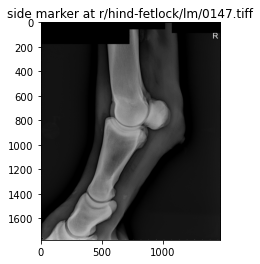

In [23]:
show_png(labels[1])

Side markers are `L` or `R` that can be a metal marker or "typed".

How many images have side marker?

In [24]:
df[labels[1]].sum() / df.shape[0]

0.1926557239057239

# Lateral Marker

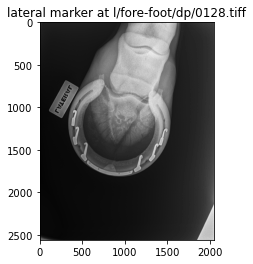

In [25]:
show_png(labels[2])

Lateral markers are `LATERAL` in a metal marker.

How many images have lateral marker?

In [26]:
df[labels[2]].sum() / df.shape[0]

0.09806397306397306

# Chain

In [27]:
show_png(labels[5])

Some metal markers were connected to a metal chain.

How many images have chain?

In [28]:
df[labels[5]].sum() / df.shape[0]

0.0005260942760942761

# Shoe

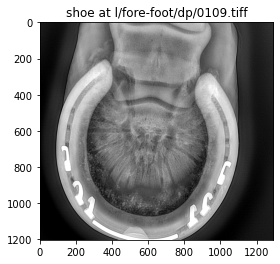

In [29]:
show_png(labels[3])

It is not limited to only foot.

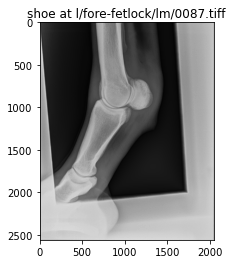

In [30]:
show_png(labels[3])

How many images of foot have shoe?

In [31]:
radiographs = df.loc[
    df["view"].isin(
        [
            "L FORE FOOT DP",
            "L FORE FOOT LM",
            "R FORE FOOT DP",
            "R FORE FOOT LM",
        ]
    ),
    labels[3],
]

radiographs.sum() / len(radiographs)

0.9911616161616161

How many images of flexed fetlock have shoe?

In [32]:
radiographs = df.loc[
    df["view"].isin(
        [
            "L FORE FETLOCK FLEXED DP",
            "L FORE FETLOCK FLEXED LM",
            "R FORE FETLOCK FLEXED DP",
            "R FORE FETLOCK FLEXED LM",
        ]
    ),
    labels[3],
]

radiographs.sum() / len(radiographs)

0.31186868686868685

# Shoe Nail

In [33]:
show_png(labels[4])

It is not limited to only foot.

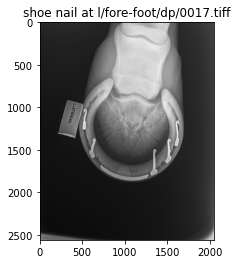

In [34]:
show_png(labels[4])

How many images of foot have shoe nail?

In [35]:
radiographs = df.loc[
    df["view"].isin(
        [
            "L FORE FOOT DP",
            "L FORE FOOT LM",
            "R FORE FOOT DP",
            "R FORE FOOT LM",
        ]
    ),
    labels[4],
]

radiographs.sum() / len(radiographs)

0.9823232323232324

How many images of flexed fetlock have shoe nail?

In [36]:
radiographs = df.loc[
    df["view"].isin(
        [
            "L FORE FETLOCK FLEXED DP",
            "L FORE FETLOCK FLEXED LM",
            "R FORE FETLOCK FLEXED DP",
            "R FORE FETLOCK FLEXED LM",
        ]
    ),
    labels[4],
]

radiographs.sum() / len(radiographs)

0.2222222222222222

# Pen

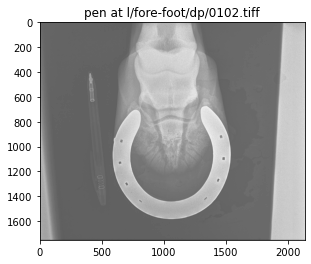

In [37]:
show_png(labels[6])

How many images have pen?

In [38]:
df[labels[6]].sum() / df.shape[0]

0.003367003367003367

# Needle

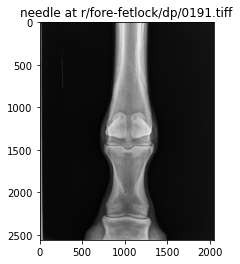

In [39]:
show_png(labels[7])

How many images have needle?

In [40]:
df[labels[7]].sum() / df.shape[0]

0.0017887205387205388

# Lead Glove

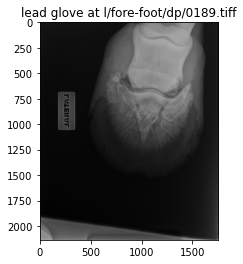

In [41]:
show_png(labels[8])

The portion of the lead glove varies from the tip of the glove to part of the finger.

How many images have lead glove?

In [42]:
df[labels[8]].sum() / df.shape[0]

0.028514309764309763

# Flipped

In [43]:
show_png(labels[9])

Some images were flipped horizontally. For example, the tip of the hoof is in the right side instead of the left side.

How many images are flipped?

In [44]:
df[labels[9]].sum() / df.shape[0]

0.0008417508417508417

# Margin

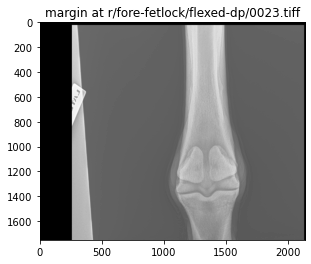

In [45]:
show_png(labels[10])

Some images have a black margin.

How many images have margin?

In [46]:
df[labels[10]].sum() / df.shape[0]

0.00021043771043771043